# AIT Development notebook


## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|3|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit(second cell, you set use modules.)|
| 4|import|2|you should write use import modules.<br>but bottom lines do not edit.|should edit(first cell, you import your moduel.)|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

## notebook template revision history

### 1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

### 1.0.0 2020/10/12

* new cerarion

In [ ]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re

    def numericalSort(value):
        numbers = re.compile(r'(\d+)')
        parts = numbers.split(value)
        parts[1::2] = map(int, parts[1::2])
        return parts
    latest_sdk_file_path=sorted(glob('../lib/*.whl'), key=numericalSort)[-1]

    ait_sdk_name = Path(latest_sdk_file_path).name
    
    # copy to develop dir
    import shutil
    current_dir = %pwd
    shutil.copyfile(f'../lib/{ait_sdk_name}', f'{current_dir}/{ait_sdk_name}')

    # install ait-sdk
    !pip install --upgrade pip
    !pip install --force-reinstall ./$ait_sdk_name

     |████████████████████████████████| 1.5 MB 5.4 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.3.1
    Uninstalling pip-20.3.1:
      Successfully uninstalled pip-20.3.1
Processing ./ait_sdk-0.1.5-py3-none-any.whl
     |████████████████████████████████| 95 kB 2.3 MB/s eta 0:00:011     |██████▉                         | 20 kB 14.8 MB/s eta 0:00:01
  Using cached nbformat-5.0.8-py3-none-any.whl (172 kB)
     |████████████████████████████████| 14.9 MB 13.7 MB/s eta 0:00:01   |██████▏                         | 2.9 MB 8.8 MB/s eta 0:00:02     |█████████████                   | 6.0 MB 8.8 MB/s eta 0:00:02 9.5 MB 8.8 MB/s eta 0:00:01
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
     |████████████████████████████████| 465 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 6.1 MB/s eta 0:00:011    |███▊                            | 3.0 MB 10.9 MB/s eta 0:00:03     |████████████████▏               | 13.0 MB 11.7 MB/s eta 

In [3]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

In [4]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package('sklearn')
    requirements_generator.add_package('numpy')
    requirements_generator.add_package('seaborn')
    requirements_generator.add_package('opencv-python')

In [5]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.5-py3-none-any.whl
     |████████████████████████████████| 285 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 50.4 MB 10.7 MB/s eta 0:00:01   |█▎                              | 1.9 MB 6.3 MB/s eta 0:00:08     |██                              | 3.0 MB 6.3 MB/s eta 0:00:08     |██▏                             | 3.4 MB 6.3 MB/s eta 0:00:08     |██▌                             | 3.9 MB 6.3 MB/s eta 0:00:08     |██████                          | 9.3 MB 6.3 MB/s eta 0:00:07     |███████████▊                    | 18.5 MB 8.0 MB/s eta 0:00:04     |███████████████▍                | 24.2 MB 15.7 MB/s eta 0:00:02     |███████████████▋                | 24.6 MB 15.7 MB/s eta 0:00:02     |████████████████                | 25.1 MB 15.7 MB/s eta 0:00:02     |█████████████████▊              | 27.9 MB 15.7 MB/s eta 0:00:02     |██████████████████▉             | 29.6 MB 15.7 MB/s eta 0:00:02     |█████████████████████▏          | 33.4 MB 5.2 MB/s eta 0:00:04     

In [6]:
if not is_ait_launch:
    # install for opencv
    !apt-get update -y 
    !apt-get install -y libgl1-mesa-dev

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/multiverse amd64 Packages [42.3 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 Packages [2321 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Get:7 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [284 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [1890 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [314 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [35.5 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1381 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2151 kB]
F

In [7]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pandas as pd
from pathlib import Path
from os import makedirs, path

In [8]:
#########################################
# area:import
# do not edit
#########################################

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [9]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_mnist_data_coverage')
    manifest_genenerator.set_ait_description('''
    Calculate coverage for the contour area and perimeter of the dataset MNIST image.\r\n
    \r\n
    𝐶𝑜𝑣[𝑥(𝑛)]=|𝑚𝑎𝑥{𝑥(𝑛)}−𝑚𝑖𝑛{𝑥(𝑛)}|/| 〖ℎ𝑖𝑔ℎ〗_𝑖−〖𝑙𝑜𝑤〗_𝑖 | 
    ''')
    manifest_genenerator.set_ait_author('AIST')
    manifest_genenerator.set_ait_email('')
    manifest_genenerator.set_ait_version('0.1')
    manifest_genenerator.set_ait_quality('https://airc.aist.go.jp/aiqm/quality/internal/Diversity_of_test_data')
    manifest_genenerator.set_ait_reference('')
    manifest_genenerator.add_ait_inventories(name='images', 
                                             type_='dataset', 
                                             description='MNIST images', 
                                             format_=['gz'], 
                                             schema='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com')
    manifest_genenerator.add_ait_inventories(name='labels', 
                                             type_='dataset', 
                                             description='MNIST labels', 
                                             format_=['gz'], 
                                             schema='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com')
    manifest_genenerator.add_ait_parameters(name='coverage_category', 
                                            type_='str', 
                                            description='''
                                            Specify what coverage rate to be calculated.\n
                                            Area = Tire area\n
                                            ArcLength = contour perimeter length\n
                                            Mean = Average pixel value\n"
                                            ''', 
                                            default_val='Area')
    manifest_genenerator.add_ait_parameters(name='interval', 
                                            type_='int', 
                                            description='The interval factor used to calculate coverage.', 
                                            default_val='100')
    manifest_genenerator.add_ait_parameters(name='max_range', 
                                            type_='int', 
                                            description='The max_range factor used in coverage calculations.', 
                                            default_val='800')
    manifest_genenerator.add_ait_measures(name='coverage_total_measures', 
                                          type_='float', 
                                          description='Overall coverage within the expected range.', 
                                          structure='single',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_measures(name='coverage_each_measures', 
                                          type_='float', 
                                          description='Each class coverage within the expected range.', 
                                          structure='sequence',
                                          min='0',
                                          max='1')
    manifest_genenerator.add_ait_resources(name='count_total_class', 
                                           type_='picture', 
                                           description='Total coverage for all classes.')
    manifest_genenerator.add_ait_resources(name='count_each_class', 
                                           type_='picture', 
                                           description='Total coverage for each classes.')
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AITLog')
    manifest_path = manifest_genenerator.write()

In [10]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='images',
                                        value='train_images/train-images-idx3-ubyte.gz')
    input_generator.add_ait_inventories(name='labels',
                                        value='train_labels/train-labels-idx1-ubyte.gz')
    input_generator.set_ait_params(name='coverage_category',
                                   value='Area')
    input_generator.set_ait_params(name='interval',
                                   value='100')
    input_generator.set_ait_params(name='max_range',
                                   value='800')
    input_generator.write()

In [11]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [12]:
def load_mnist_label(path):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    return labels

def load_mnist_image(path, labels):

    """Load MNIST data from `path`"""
    images_path = os.path.join(path)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images

def calc_moment_image(start_offset:int ,class_no, target_indexes, X_target, df):
    index = start_offset
    for image_index in target_indexes[class_no]:
        _,thresh = cv2.threshold(X_target[image_index].reshape(28,28), 0, 255, cv2.THRESH_BINARY)

        # 輪郭の検出
        contours, _ = cv2.findContours(thresh , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        
        # 最大の輪郭面積を取得
        max_area = 0
        max_area_index = 0
        for i in range(len(contours)):
            area = cv2.contourArea(contours[i])
            if area > max_area:
                max_area = area
                max_area_index = i
            
        # 矩形領域
        x, y, w, h = cv2.boundingRect(contours[max_area_index])

        # 重心
        m = cv2.moments(contours[max_area_index])
        cx = int(m['m10']/m['m00'])
        cy = int(m['m01']/m['m00'])

        # 周囲長
        arc_length = cv2.arcLength(contours[max_area_index],True)
        
        # 最小外接円
        _,radius = cv2.minEnclosingCircle(contours[max_area_index])
        radius = int(radius)

#         # 傾き
#         _,_,angle = cv2.fitEllipse(contours[max_area_index])
        
        # 画素平均
        mean_val = cv2.mean(thresh)

        df.iloc[index,:] = [class_no, image_index, max_area_index, max_area, x, y, w, h, cx, cy, arc_length, radius, mean_val]
        index+=1

    return index

def def_calc_cov(target_moment_df, col_name, max_range ,interval):
    
    area_count_df = pd.DataFrame(columns=['StartRange','StopRange','Count'])

    for r in range(0, max_range, interval):
        range_ = r+interval
        cond_df = ((target_moment_df[col_name]>=r) & (target_moment_df[col_name]<range_))

        se = pd.Series([r, range_, cond_df.sum()], index=area_count_df.columns )
        area_count_df = area_count_df.append(se, ignore_index=True )

    min_ = target_moment_df[col_name].min()
    max_ = target_moment_df[col_name].max()

    target_calc_df = area_count_df.query('Count > 0')
    low = target_calc_df['StartRange'].min()
    high = target_calc_df['StopRange'].max()

    cov = (max_ - min_) / (high - low)
    
    return cov

In [13]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@measures(ait_output, 'coverage_total_measures')
def total_calc_cov(target_moment_df, col_name, max_range ,interval):
    
    cov = def_calc_cov(target_moment_df, col_name, max_range ,interval)
    
    return cov

In [14]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@measures(ait_output, 'coverage_each_measures', is_many=True)
def each_calc_cov(target_moment_df, col_name, max_range ,interval, class_num):
    
    list_cov = []
    
    for c in class_num:
        cov = def_calc_cov(target_moment_df.query(f'ClassNo == {c}'), col_name, max_range, interval)
        print(f'class:{c} cov:{cov}')
        list_cov.append(cov)
    
    return list_cov

In [15]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'count_total_class', 'count_total_class.png')
def map_total_calc_cov(target_moment_df, col_name, title, file_path: str=None ):
    
    # 過去に保存した同じファイルがあれば削除
    if path.exists(file_path):
        os.remove(file_path)
    
    sns_plt = sns.displot(data=target_moment_df, x=col_name)
    plt.title(title)
    sns_plt.savefig(file_path)

In [16]:
#########################################
# area:functions
# should edit
#########################################
    
@log(logger)
@resources(ait_output, path_helper, 'count_each_class', 'count_class{}.png')
def map_each_calc_cov(target_moment_df, col_name, class_num, file_path: str=None ):
    
    out_files = []
    
    for c in class_num:
        title = f'{col_name} count for class {c}'
    
        sns_plt = sns.displot(data=target_moment_df.query(f'ClassNo == {c}'), x=col_name)
        plt.title(title)
        #sns_plt.savefig(file_path)
        
        out_file = file_path.format(c)
        out_files.append(out_file)
        
        print(out_file)

        # 過去に保存した同じファイルがあれば削除
        if path.exists(out_file):
            os.remove(out_file)
        sns_plt.savefig(out_file)
        
    return out_files

In [17]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> None:

    shutil.move(get_log_path(), file_path)

In [18]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:

    label_path = ait_input.get_inventory_path('labels')
    image_path = ait_input.get_inventory_path('images')
    input_parameter_category = ait_input.get_method_param_value('coverage_category')
    input_parameter_interval = ait_input.get_method_param_value('interval')
    input_parameter_max_range = ait_input.get_method_param_value('max_range')
    
    
    # load data
    y_target = load_mnist_label(label_path)
    X_target = load_mnist_image(image_path, y_target)
    
    classes = np.unique(y_target)
    target_indexes={}

    # クラス分類
    for c in classes:
        target_indexes[c] = np.where(y_target == c)[0]
    
    moment_df = pd.DataFrame(columns=['ClassNo','ImageIndex','AreaID','Area','Rect-X','Rect-Y','Rect-W','Rect-H','Center-X','Center-Y','ArcLength', 'Radius', 'Mean'] ,index=range(X_target.shape[0]))
    
    index = 0
    for c in classes:
        index = calc_moment_image(index, c, target_indexes, X_target, moment_df)

    # トータルのカバレッジ
    cov = total_calc_cov(moment_df, col_name=input_parameter_category, max_range=input_parameter_max_range, interval=input_parameter_interval)
    print(f'total cov:{cov}')
    # トータルのカバレッジの図
    map_total_calc_cov(moment_df, col_name=input_parameter_category, title=f'{input_parameter_category} count for total class')
    
    # クラス別のカバレッジ
    list_cov = each_calc_cov(moment_df, col_name=input_parameter_category, max_range=input_parameter_max_range, interval=input_parameter_interval, class_num=classes)
    
    # クラス別のカバレッジの図
    each_cov_map = map_each_calc_cov(moment_df, col_name=input_parameter_category, class_num=classes)
    
    move_log()

/usr/local/lib/python3.6/dist-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)


total cov:0.88625
class:0 cov:0.7835714285714286
class:1 cov:0.8375
class:2 cov:0.88
class:3 cov:0.824375
class:4 cov:0.83
class:5 cov:0.9021428571428571
class:6 cov:0.8541666666666666
class:7 cov:0.9175
class:8 cov:0.8707142857142857
class:9 cov:0.7791666666666667
/usr/local/qai/mnt/ip/job_result/1/1/resources/count_each_class/count_class0.png
/usr/local/qai/mnt/ip/job_result/1/1/resources/count_each_class/count_class1.png
/usr/local/qai/mnt/ip/job_result/1/1/resources/count_each_class/count_class2.png
/usr/local/qai/mnt/ip/job_result/1/1/resources/count_each_class/count_class3.png
/usr/local/qai/mnt/ip/job_result/1/1/resources/count_each_class/count_class4.png
/usr/local/qai/mnt/ip/job_result/1/1/resources/count_each_class/count_class5.png
/usr/local/qai/mnt/ip/job_result/1/1/resources/count_each_class/count_class6.png
/usr/local/qai/mnt/ip/job_result/1/1/resources/count_each_class/count_class7.png
/usr/local/qai/mnt/ip/job_result/1/1/resources/count_each_class/count_class8.png
/usr/

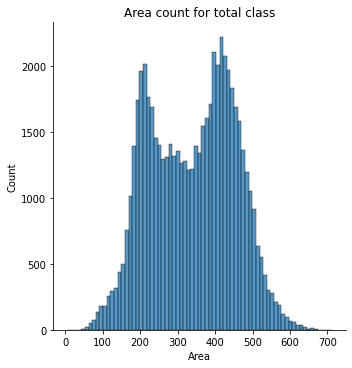

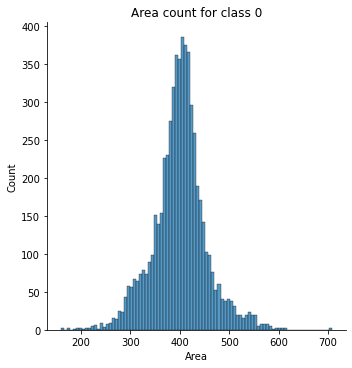

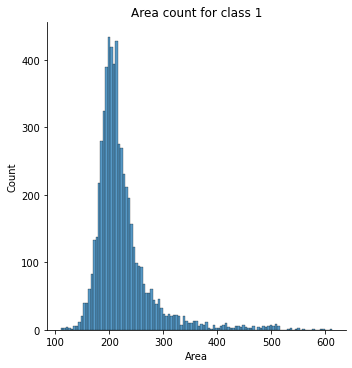

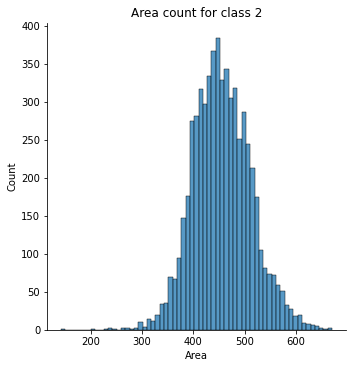

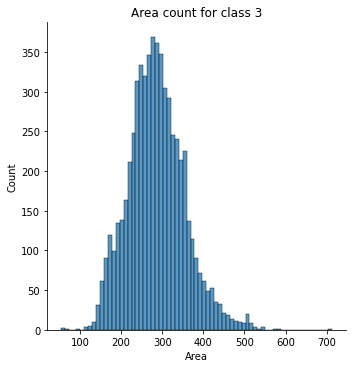

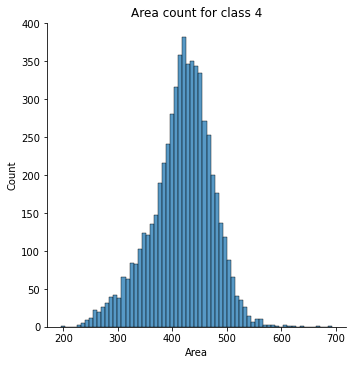

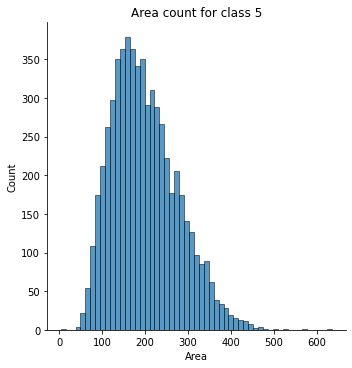

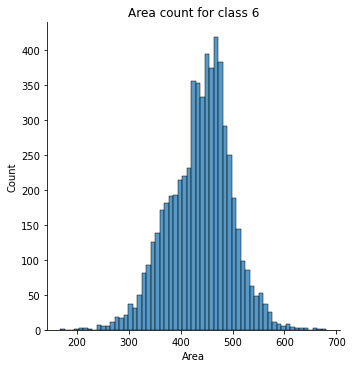

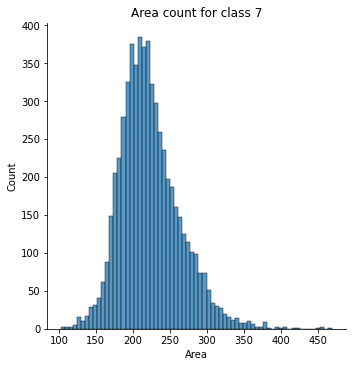

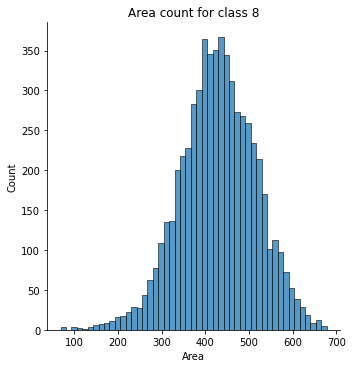

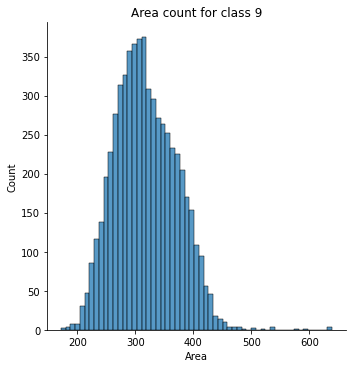

In [19]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [20]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2020'

In [21]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_manifest, ait_sdk_name, current_dir, requirements_path, is_remote_deploy=True)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
